In [3]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#read titanic.csv file into pandas dataframe
train=pd.read_csv('desktop/titanic.csv')

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
#use seaborn to create a simple heatmap to see missing data
train.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


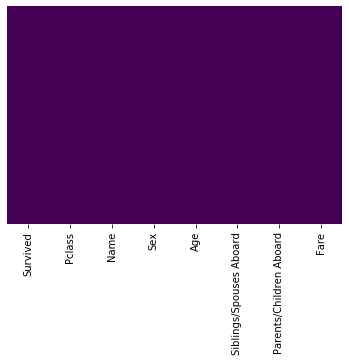

In [7]:
#visualizing the missing data
#data cleaning
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#no missing values

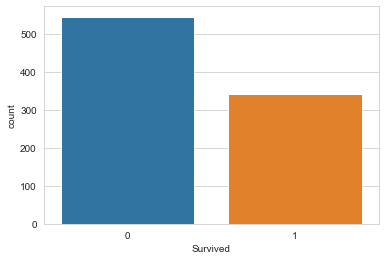

In [8]:
#visualizing some more data
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
#if survived=0(person died) survived=1(person alive)

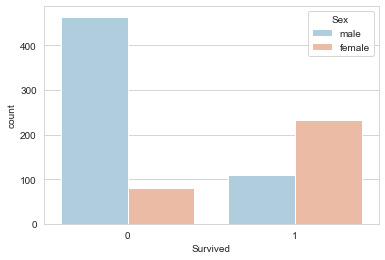

In [9]:
#checking the survival rate based on gender
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
#from the data most of the male have not survived 

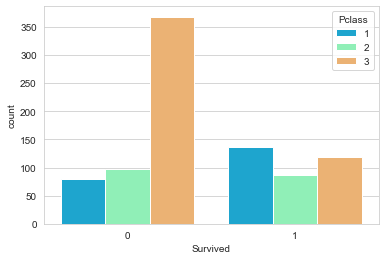

In [10]:
#checking the survivals based on Passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
#note:there are 3 passenger class(Pclass)-1,2,3 
#Pclass 3 has more number of deaths

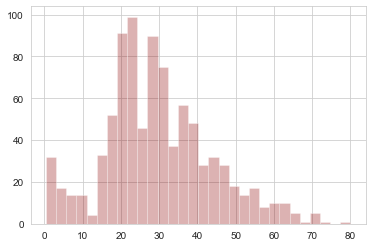

In [11]:
#age distribution
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

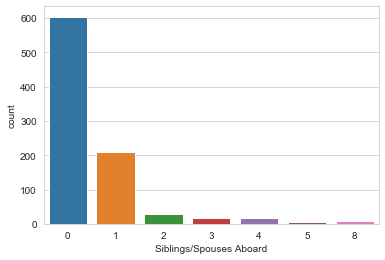

In [12]:
#countplot of siblings and spouse
sns.countplot(x='Siblings/Spouses Aboard',data=train)

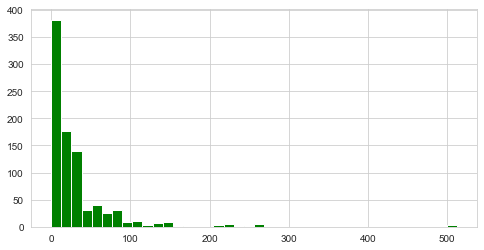

In [13]:
#histogram for Fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

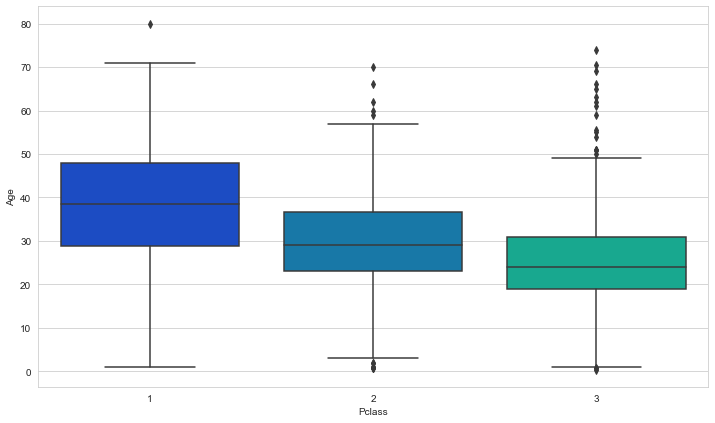

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
#average age in each passenger class

In [15]:
train.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [16]:
#converting categorical features
#we need to convert categorical features to dummy variables using pandas.otherwise our ML wouldn't be able to directly take those features as input
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [17]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [18]:
#dropping the unwanted columns
train.drop(['Sex','Name'],axis=1,inplace=True)

In [19]:
#sns.heatmap(train.corr()).set_title('corrrelation heat map for candidate variables')

In [20]:
train.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [21]:
#appending the 'sex' column
train=pd.concat([train,sex],axis=1)

In [22]:
train.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [23]:
#'Survived' is the dependent feature
#building a logistic regression model:


In [24]:
#Train Test Split
train.drop('Survived',axis=1).head()     #'x'

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [25]:
train['Survived'].head()            #'y'

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],
                                               test_size=0.30,
                                               random_state=101)

In [28]:
#Training and Prediction
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred=logmodel.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
accuracy=confusion_matrix(y_test,y_pred)

In [33]:
accuracy

array([[138,  21],
       [ 37,  71]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7827715355805244

In [37]:
#building the random forest model using the training dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RandFor=RandomForestClassifier(max_depth=6,min_samples_split=2,n_estimators=100,random_state=1)
RandFor.fit(x_train,y_train)
#testing the model with test dataset
y_pred=RandFor.predict(x_test)
print('The model accuracy is',metrics.accuracy_score(y_pred,y_test))
print('The R-square value is',metrics.r2_score(y_pred,y_test))

The model accuracy is 0.8314606741573034
The R-square value is 0.24157303370786531
